In [32]:
from matplotlib import pyplot as plt
import numpy as np

from helper_functions import generate_x
from QHO_Analytical import QHO_analytical_soloution
from QuantumHarmonics_QHO import QHO_simulation
#from hydrogen_analytical import hydrogen_analytical_soloution
#from QuantumHarmonics_Hydrogen import hydrogen_simulation

### - Testing solvers vs QHO analytical soloution to quantify error 
def plot_e_vals_comparison(n_vals, e_vals, analytical_e_vals):
    """
    Input: N: 
        Int value for number of points to divide the spatial range into, 
        maxE_val: maximum desired eigenvalue, 
        potential_function: pass in function for potential energy (allows this to be used for both QHO and Hydrogen)
        analytical_function: pass in function for analytical eigenvalues (allows this to be used for both QHO and Hydrogen)

    Returns:
        e_vals: 1D array of eigenvalues from the tridiagonal solver
        E_vectors_tridiag: 2D array of eigenvectors from the tridiagonal solver
        abs_error_vals: 1D array of the absolute error between the analytical and tridiagonal solver eigenvalues
        x: 1D array of spatial x values
        V: 1D array of potential energy values

        """
    #Calculating error of simulation relative to the analytical result
    abs_error_vals = abs(analytical_e_vals - e_vals.real)

    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)
    
    #plotting analytical results vs n compared to my results vs n
    plt.subplot(1,2,1)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Energy $(\\frac{1}{2}ℏ𝜔)$")
    plt.scatter(n_vals, analytical_e_vals, c='r', label='Analytical',)
    plt.plot(n_vals, e_vals.real, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()

    # calculate the relative error in percent
    relative_error = (abs_error_vals / analytical_e_vals) * 100

    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Abs Error $(\\frac{1}{2}ℏ𝜔)$", color='g')
    plt.plot(n_vals, abs_error_vals, c='g', label='simulation abs error')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()


    # add new y axis on right side of plot to show error
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Relative Error $(\\%)$', color='y') 
    plt.plot(n_vals, relative_error, c='y', label='simulation rel error')

    plt.legend()  # fix by removing plot helper
    plt.show()
    
def plot_e_vecs_comparison(n_vals, x, e_vectors, analytical_e_vectors):

    # flip the evactors dims from M, N to N, M
    #e_vectors = np.array(e_vectors).T
    #analytical_e_vectors = np.array(analytical_e_vectors)


    #Calculating error of simulation relative to the analytical result
    abs_error_vals = np.sum(abs(analytical_e_vectors**2 - e_vectors**2), axis=1)
    # calculate the relative error in percent
    relative_error = (abs_error_vals / np.sum(analytical_e_vectors**2, axis=1)) * 100     


    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

    
    #plotting analytical results vs n compared to my results vs n
    plt.subplot(1,2,1)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Energy $(\\frac{1}{2}ℏ𝜔)$")
    plt.scatter(n_vals, np.sum(analytical_e_vectors**2, axis=1), c='r', label='Analytical')
    plt.plot(n_vals, np.sum(e_vectors**2, axis=1), c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()

    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Abs Error $(\\frac{1}{2}ℏ𝜔)$", color='g')
    plt.plot(n_vals, abs_error_vals, c='g', label='simulation abs error')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()
    
    # add new y axis on right side of plot to show error
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Relative Error $(\\%)$', color='y') 
    plt.plot(n_vals, relative_error, c='y', label='simulation rel error')
    plt.show()

def plot_e_vecs_normalisation_comparison(n_vals, x, e_vectors, analytical_e_vectors):
    integrals = []
    # iterate through the second dim   'e_vectors' which is shape (100, 10)
    for i in range(e_vectors.shape[0]):
        integrals.append(np.trapz(e_vectors[i]**2, x))
    integrals = np.array(integrals)

    #Calculating error of simulation relative to the analytical result
    abs_error_vals = abs(1 - integrals)
    # calculate the relative error in percent
    relative_error = (abs_error_vals / 1) * 100     # / 1 unnecessary but included for clarity
    
    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)
    
    #plotting analytical results vs n compared to my results vs n
    plt.subplot(1,2,1)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Energy $(\\frac{1}{2}ℏ𝜔)$")
    plt.scatter(n_vals, np.full_like(n_vals, 1), c='r', label='Analytical',)
    plt.plot(n_vals, integrals, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()

    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Abs Error $(\\frac{1}{2}ℏ𝜔)$", color='g')
    plt.plot(n_vals, abs_error_vals, c='g', label='simulation abs error')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()
    
    # add new y axis on right side of plot to show error
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Relative Error $(\\%)$', color='y') 
    plt.plot(n_vals, relative_error, c='y', label='simulation rel error')
    plt.show()
    
def test_QHO_accuracy(N, x_min, x_max, min_n, max_n):

    # spatial discretisation
    x, delta_x = generate_x(x_min, x_max, N)  

    print("Testing QHO accuracy")
    print(f"{'N':<10}{'Min x':<15}{'Max x':<15}{'Length x':<15}{'Delta x':<15}{'Min n':<10}{'Max n':<10}")
    print(f"{N:<10}{x_min:<15}{x_max:<15}{len(x):<15}{delta_x:<15}{min_n:<10}{max_n:<10}")

    #Analytical solution
    n_vals, e_vals_analytical, e_vectors_analytical = QHO_analytical_soloution(x, max_n, min_n)

    #Simulation
    V_qho, e_vals, e_vectors = QHO_simulation(x, delta_x, max_n, min_n)

    #Comparing results
    #plot_e_vals_comparison(n_vals, e_vals, e_vals_analytical)
    plot_e_vecs_comparison(n_vals, x, e_vectors, e_vectors_analytical)
    #plot_e_vecs_normalisation_comparison(n_vals, x, e_vectors, e_vectors_analytical)

def test_hydrogen_accuracy(N, r_min, r_max, min_n, max_n):

    # spatial discretisation
    x, delta_x = generate_x(r_min, r_max, N)   

    #Analytical solution
    n_vals, e_vals_analytical, e_vectors_analytical, p_densitys_analytical = hydrogen_analytical_soloution(x, max_n, min_n)

    #Simulation
    V_qho, e_vals, e_vectors, p_densitys = hydrogen_simulation(x, delta_x, max_n, min_n)

    #Comparing results
    plot_e_vals_comparison(n_vals, e_vals, e_vals_analytical)
    plot_e_vecs_comparison(n_vals, x, e_vectors, e_vectors_analytical)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
100       -5             5              101            0.1            1         2         
2


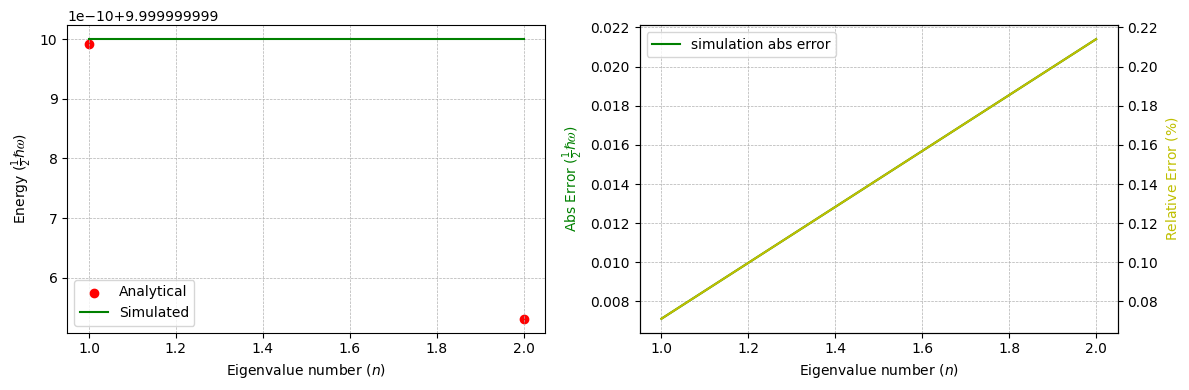

In [33]:
test_QHO_accuracy(N=100, x_min=-5, x_max=5, max_n=2, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
100       -50            50             101            1.0            1         100       
100


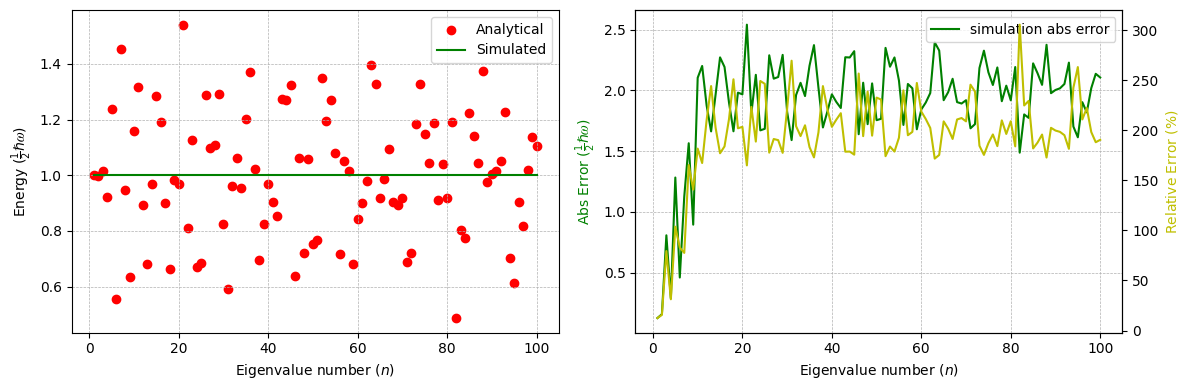

In [34]:
test_QHO_accuracy(N=100, x_min=-50, x_max=50, max_n=100, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
100       -150           150            101            3.0            1         100       
100


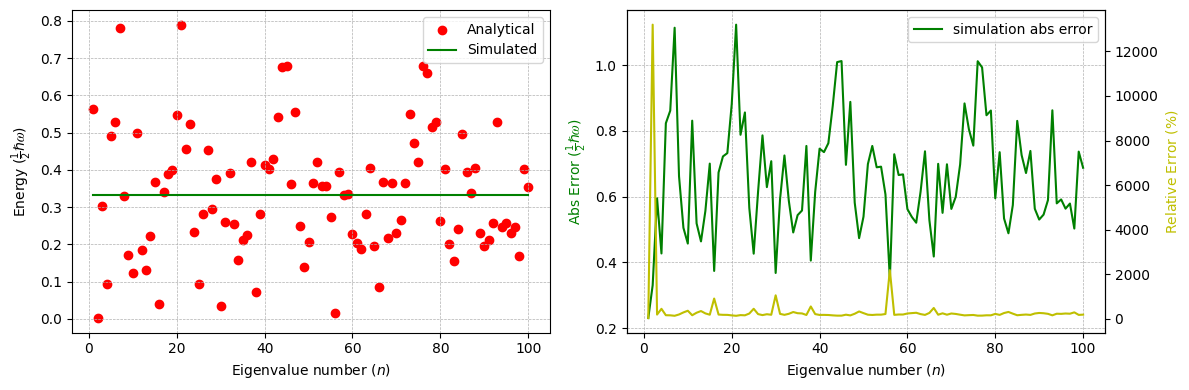

In [35]:
test_QHO_accuracy(N=100, x_min=-150, x_max=150, max_n=100, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
999       -5             5              1000           0.010010010010010011         100       
100


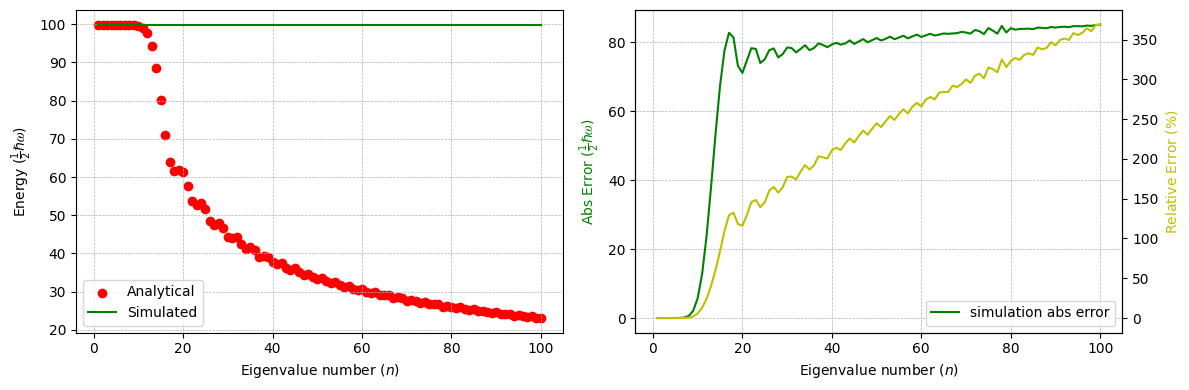

In [36]:
test_QHO_accuracy(N=999, x_min=-5, x_max=5, max_n=100, min_n=1)

In [37]:
test_QHO_accuracy(N=999, x_min=-50, x_max=50, max_n=100, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
999       -100           100            1000           0.20020020020020021         100       
100


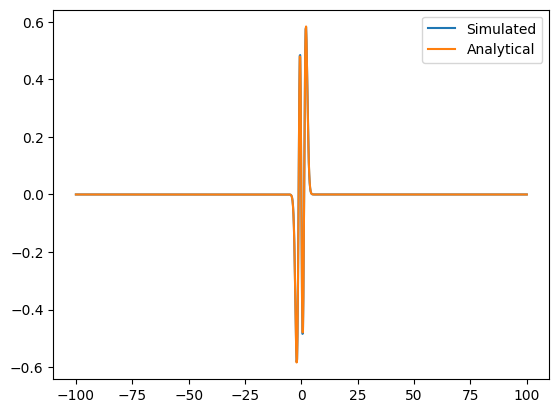

In [ ]:
test_QHO_accuracy(N=999, x_min=-100, x_max=100, max_n=100, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
25000     -200           200            25001          0.016          1         100       
100


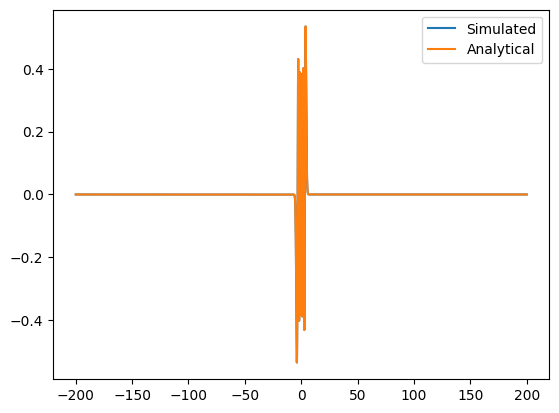

In [ ]:
test_QHO_accuracy(N=25000, x_min=-200, x_max=200, max_n=100, min_n=1)

In [ ]:
test_QHO_accuracy(N=30000, x_min=-300, x_max=300, max_n=500, min_n=1)

Testing QHO accuracy
N         Min x          Max x          Length x       Delta x        Min n     Max n     
30000     -300           300            30001          0.02           1         500       
500


c:\Users\Ada\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\hermite.py:895: RuntimeWarning: overflow encountered in multiply
  return c0 + c1*x2
a:\Users\Ada\GitHub\QuantumHarmonics\QuantumHarmonics\QHO_Analytical.py:38: RuntimeWarning: invalid value encountered in multiply
  term = prefactor * hermite * gaussian  # Multiply Hermite polynomial by Gaussian
c:\Users\Ada\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\hermite.py:894: RuntimeWarning: overflow encountered in multiply
  c1 = tmp + c1*x2
c:\Users\Ada\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\hermite.py:893: RuntimeWarning: overflow encountered in multiply
  c0 = c[-i] - c1*(2*(nd - 1))
c:\Users\Ada\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\hermite.py:895: RuntimeWarning: invalid value encountered in add
  return c0 + c1*x2
c:\Users\Ada\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomi